In [1]:
import os
import re
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.models import CoherenceModel 
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akashborigi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akashborigi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akashborigi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akashborigi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Preprocessing and exploratory data analysis

### Find a way to build a corpus (e.g. load the data as large character, split up the input data into individual articles and build a corpus object containing all splitted articles)

### clean up the corpus, make sure you separate meta-data from the actual articles

### extract features

### create summaries on the features as exploration

### create some plots for exploration

### You will need to preprocess the documents having in mind that they represent newspaper articles. One of the things you will need to do is tokenize the text. And this will probably be a trial and error task. For instance, you will need to separate punctuation marks from words. There may also be special headers, tags, dates, or other nuances that need to be handled properly. We will be looking into how clean your post-processed data is as part of the grading for this assignment.

In [2]:
# pre-processing data
def preprocess_data(data_dir, custom_stopwords=None):
    cleaned_articles = []
    word_counts = []
    sentence_lengths = []
    word_freq = {}
    file_names = os.listdir(data_dir)

    for file_name in file_names:
        with open(os.path.join(data_dir, file_name), 'r', encoding='utf-8') as file:
            article = file.read()

            parts = re.split(r'\n{2,}', article, maxsplit=1)
            if len(parts) > 1:
                metadata, article_text = parts[0], parts[1]
            else:
                metadata, article_text = "", parts[0]

            words = word_tokenize(article_text)
            
            # Convert words to lowercase and remove non-alphanumeric characters and punctuation
            words = [word.lower() for word in words if word.isalnum() and word not in string.punctuation]

            # Remove stopwords
            words = [word for word in words if word not in stopwords.words('english')]

            # Remove custom stopwords
            if custom_stopwords:
                words = [word for word in words if word not in custom_stopwords]

            sentences = sent_tokenize(article_text)

            word_count = len(words)

            if sentences:
                avg_sentence_length = sum(len(sent.split()) for sent in sentences) / len(sentences)
            else:
                avg_sentence_length = 0

            cleaned_articles.append(article_text)
            word_counts.append(word_count)
            sentence_lengths.append(avg_sentence_length)

            for word in words:
                if word in word_freq:
                    word_freq[word] += 1
                else:
                    word_freq[word] = 1

    return cleaned_articles, word_counts, sentence_lengths, word_freq, file_names

In [3]:
# exploration data
def explore_data(cleaned_articles, word_counts, sentence_lengths, word_freq, file_names):
    # Create a summary of features
    article_summary = pd.DataFrame({
        'File Name': file_names,
        'Word Count': word_counts,
        'Average Sentence Length': sentence_lengths,
    })
    
    # Generate some plots for exploration
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.hist(word_counts, bins=10, color='cyan', edgecolor='black')
    plt.title('Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')

    plt.subplot(122)
    plt.hist([length for length in sentence_lengths if length > 0], bins=10, color='lightcoral', edgecolor='black')
    plt.title('Average Sentence Length Distribution (Excluding Articles with Zero Sentences)')
    plt.xlabel('Average Sentence Length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Create a DataFrame for word frequencies
    word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Frequency': list(word_freq.values())})

    # Sort the DataFrame by frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

    # Plot the top-10 most frequent words
    plt.figure(figsize=(10, 5))
    word_freq_df.head(10).plot(x='Word', y='Frequency', kind='bar', legend=False)
    plt.title('Top  Most Frequent Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

    # Word cloud visualization
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

    return article_summary

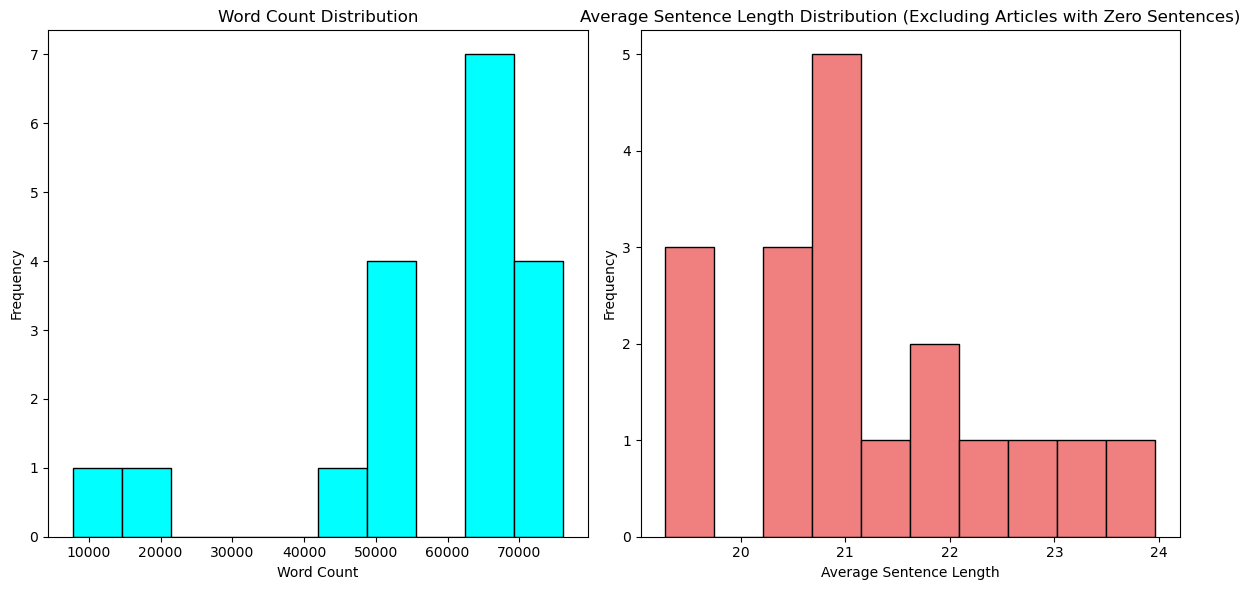

<Figure size 1000x500 with 0 Axes>

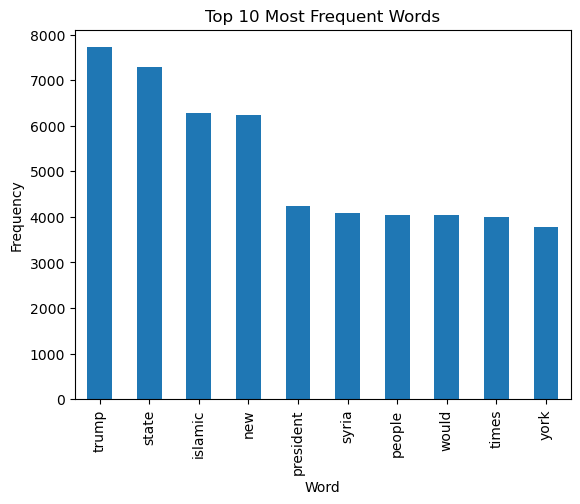

/Users/akashborigi/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


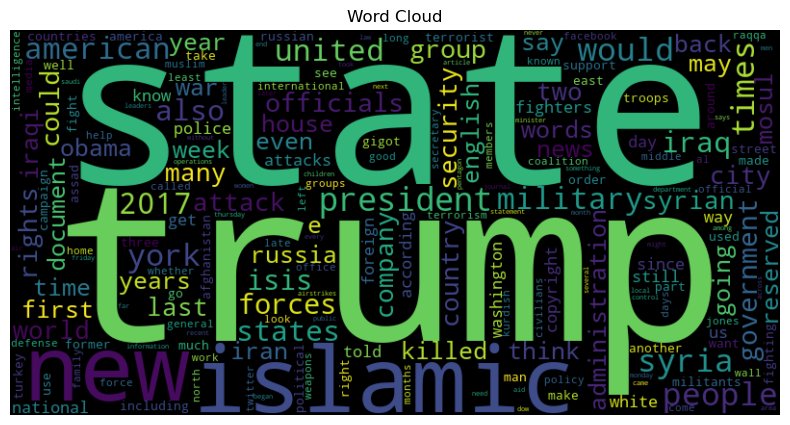

The number of articles present after cleaning are:  18


In [4]:
# Example usage:
# Example usage:
custom_stopwords = ['said', 'like', 'one']
data_directory = '/Users/akashborigi/Downloads/UH_Courses/Fall_2023/Text_Mining/Mini_Project3/Articles'
cleaned_articles, word_counts, sentence_lengths, word_freq, file_names = preprocess_data(data_directory, custom_stopwords=custom_stopwords)
article_summary = explore_data(cleaned_articles, word_counts, sentence_lengths, word_freq, file_names)
# Save cleaned articles to a file
output_file = "/Users/akashborigi/Downloads/UH_Courses/Fall_2023/Text_Mining/Mini_Project3/file.txt"
with open(output_file, 'w', encoding='utf-8') as output_file:
    for idx, article in enumerate(cleaned_articles):
        output_file.write(f"Cleaned article for file {idx + 1}:\n")
        output_file.write(article + '\n')
        output_file.write("="*50 + '\n')
print("The number of articles present after cleaning are: ", str(len(cleaned_articles)))

In [5]:
print(word_counts)
n = [round(num, 2) for num in sentence_lengths]
print(n)

[72683, 68112, 65948, 66244, 76094, 72989, 7743, 67071, 68909, 72749, 16567, 65602, 50788, 47295, 65429, 53879, 53480, 53176]
[21.05, 21.3, 21.85, 22.28, 20.79, 23.43, 23.97, 21.71, 19.68, 20.44, 19.54, 20.81, 21.04, 20.31, 21.13, 22.62, 19.28, 20.5]


In [6]:
# Output cleaned articles to separate text files
output_dir = 'cleaned_articles'
os.makedirs(output_dir, exist_ok=True)
for i, article in enumerate(cleaned_articles):
    with open(os.path.join(output_dir, f'article_{i + 1}.txt'), 'w', encoding='utf-8') as output_file:
        output_file.write(article)

# Output word counts and sentence lengths to a CSV file
article_summary.to_csv('article_summary.csv', index=False)

## 2. Topic modeling

### create a topic model using your cleaned corpus (you may have to go back into preprocessing steps to make modifications)

### re-run the topic modeling multiple times with different parameters and store summaries into output files

### discuss the different results in the context described in the overview statement

### support your findings with relevant model outputs and visualizations

### It is not expected from you to have full domain knowledge but please treat the analysis as you would support the journalist.

In [7]:
# Function to preprocess text from cleaned articles
def preprocess_text(text, custom_stopwords=None):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    tokens = word_tokenize(text)  # Tokenize

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Remove custom stopwords if provided
    if custom_stopwords:
        tokens = [word for word in tokens if word not in custom_stopwords]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [8]:
# Load documents from the cleaned corpus directory
corpus_directory = "/Users/akashborigi/Downloads/UH_Courses/Fall_2023/Text_Mining/Mini_Project3/cleaned_articles"
documents = []
for filename in os.listdir(corpus_directory):
    if filename.endswith(".txt"):
        with open(os.path.join(corpus_directory, filename), 'r') as file:
            text = file.read()
            documents.append(text)

In [9]:
# Example usage
custom_stopwords = ['said', 'like', 'one', 'mr', 'u']
preprocessed_tokens = preprocess_text(text, custom_stopwords=custom_stopwords)

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary([preprocessed_tokens])  # Wrap preprocessed_tokens in a list
corpus = [dictionary.doc2bow(preprocessed_tokens)]



In [10]:
# Topic modeling with different parameters
num_topics_list = [5, 10, 15]  # You can adjust the number of topics as needed

for num_topics in num_topics_list:
    # Train LDA model
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Generate topic summaries and print top terms
    print(f"Top terms for {num_topics} topics:")
    for topic_id in range(num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=10)
        top_terms = [word for word, prob in topic_words]
        print(f"Topic {topic_id}: {', '.join(top_terms)}")
    # Calculate and print coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=[preprocessed_tokens], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"Coherence Score for {num_topics} topics: {coherence_score}")

    # Calculate and print perplexity
    perplexity = lda_model.log_perplexity(corpus)
    print(f"Perplexity for {num_topics} topics: {perplexity}")


Top terms for 5 topics:
Topic 0: state, time, new, york, trump, isi, would, iraq, islamic, mosul
Topic 1: new, isi, state, time, york, year, iraq, islamic, trump, people
Topic 2: state, new, time, trump, islamic, york, isi, would, iraq, people
Topic 3: time, new, state, islamic, trump, isi, york, iraq, year, mosul
Topic 4: state, new, time, york, isi, islamic, trump, year, would, iraq
Coherence Score for 5 topics: 0.3219428914862312
Perplexity for 5 topics: -8.419841955348998
Top terms for 10 topics:
Topic 0: time, new, state, year, islamic, york, isi, trump, 2017, would
Topic 1: new, state, time, york, would, trump, year, islamic, iraq, isi
Topic 2: time, new, state, isi, york, islamic, mosul, year, iraq, american
Topic 3: time, state, new, isi, year, york, islamic, trump, city, 2017
Topic 4: state, new, time, york, islamic, isi, trump, year, would, iraq
Topic 5: new, time, state, york, trump, year, isi, would, iraq, united
Topic 6: state, new, time, york, iraq, trump, isi, would, isl

In [11]:
# Assume 'corpus' and 'dictionary' are prepared
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
